# **건강 데이터 분석을 통한 질병의 이해 및 건강 관리 전략 수립**

----

# **Ⅰ. 서론**

## **주제 선정 배경 : 건강 데이터 분석을 통한 질병의 이해 및 건강 관리 전략 수립**


현대 사회에서는 건강 문제가 점차 중요시되고 있다. 아래의 그래프에서, 2010년부터 2022년까지 우리나라 국민의 비만율이 계속해서 증가하고 있음을 확인할 수 있다.<br> 이러한 추세는 빠른 현대화와 경제 발전으로 인해 식습관이 변화하면서 발생한 것으로 보인다. 음식을 먹을 때 건강보다 맛을 우선시하여, 고칼로리 저영양 가공 식품의 소비가 증가하고, 고지방, 고당류, 고염분 식품을 섭취하려는 경향이 나타나고 있다. 또한, 현대 사회의 생활양식 변화와 대중교통의 발달로 인해 활동량이 감소하면서, 운동 부족 현상이 심화되고 있는 것으로 파악된다. 비만은 단순한 외형적 문제를 넘어서 당뇨병, 고혈압, 심혈관 질환 등 다양한 만성 질환의 주요 원인으로 작용하고 있다.<br>

이 분석에서는 이러한 현상을 고려하여, 비만과 관련이 있다고 알려진 다양한 요인들을 분석하고, 이로 인해 발생할 수 있는 여러 질병에 대한 이해를 더욱 심화하고자 한다.

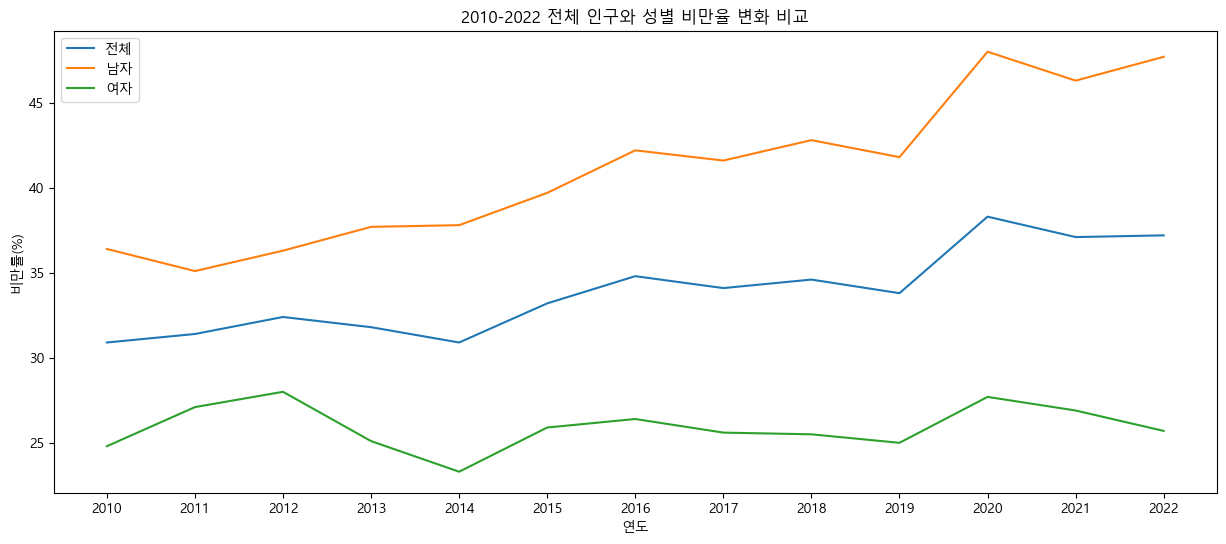

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel("obesity_rate_data.xlsx", index_col = 0)

total_p = df.loc["전체"]
male_p = df.loc["남자"]
female_p = df.loc["여자"]

years = df.columns

plt.figure(figsize = (15,6))
plt.plot(years, total_p, label="전체")
plt.plot(years, male_p, label="남자")
plt.plot(years, female_p, label="여자")
plt.title("2010-2022 전체 인구와 성별 비만율 변화 비교")
plt.xlabel("연도")
plt.ylabel("비만률(%)")

plt.legend()
plt.show()

## **가설 설정 :**

- 가설 1 : 키와 체중, 주요 영양소 섭취량을 기준으로 개인의 비만 단계(저체중, 정상, 비만)를 예측할 수 있을 것이며, 주요 영양소 섭취량이 많은 사람이 비만일 가능성이 높을 것이다.

- 가설 2 : 비만과 관련된 질병을 판단할 때 중요한 생리학적 지표(체중, 혈압, 혈당)들 간에는 서로 연관성이 있을 것으로 예상된다. 또한, 생리학적 지표와 개인의 생활 습관(운동 빈도, 지방 섭취량, 흡연량)이 개인의 건강 상태에 영향을 미칠 것으로 가정할 때, 이러한 요인들을 종합적으로 분석하면 건강한 생활 습관을 가진 사람들이 건강 상태가 더 좋을 것으로 예상된다. 따라서, 이 분석을 통해 생리학적 지표와 생활 습관 간의 상호 관련성을 파악하고, 개인의 건강 상태를 개선할 수 있는 방안을 도출할 수 있을 것으로 기대된다.

- 가설 3 : 혈압, 당화혈색소, 콜레스테롤 등 생리학적 지표와 당뇨병, 고혈압, 비만, 이상지질혈증의 발병률에는 통계적으로 유의미한 관령성이 있을 것이다. 또한, 이런 생리학적 지표들을 통하여 각 질병의 유병 유무를 예측할 수 있을 것이다.

# **Ⅱ. 분석 방법**

## **· 데이터 수집 방법**


- 네이버 검색엔진에서 "비만과 관련된 질병"이라는 키워드로 크롤링을 하여 비만과 연관된 질병들을 파악한 후, 빈번하게 언급되는 질병을 분석의 대상으로 선정하였다.
- 그러나, 해당 질병과 관련이 있는 데이터를 직접 수집하는 것은 개인 정보 보호 문제로 어려움이 있었다. 따라서, 질병관리청 2022년 국민건강영양조사 설문조사 자료를 기반으로 데이터셋을 수집하였다.

## **· 데이터 전처리**

- 특성 선택 : 원본 데이터셋은 크기가 6265*623로 매우 크기 때문에, 분석에 필요하지 않은 특성(ex. 소득 분위, 교육 수준 등)들을 전처리 과정에서 삭제했다. 그 결과, 데이터 셋의 크기가 4846\*46로 많이 줄어들었다.

- 결측치 처리 : 결측치가 있는 경우, 결측치를 대체하거나 해당 데이터를 제거하였다.

- 데이터 표준화 : 독립 변수들이 서로 다른 단위를 가지고 있을 때 발생하는 문제를 방지하고, 모델의 성능을 향상시키기 위해 표준화(StandardScaler)를 적용하여 데이터의 스케일을 조정하였다.

- 범주 축소 : 이후, 비만의 단계에 따른 카테고리를 축소하기로 결정했다. 기존에는 비만을 6개의 단계로 나누어 표현했지만, 설명을 단순화하기 위해 저체중을 1, 정상과 비만 전단계를 2, 비만을 3으로 축소하였다. 이를 통해 설명이 간결해지면서도 분석이 복잡해지지 않도록 하였다. 범주가 여러개로 나누어진 다른 질병에 대해서도 비슷한 방법으로 범주를 축소시켰다.

## **· 변수 선택 및 검증**

- 다중 공선성 확인 : 독립 변수 간의 다중 공선성을 확인하기 위해 VIF를 계산하였다. VIF 값이 너무 큰 변수는 분석에서 제외하였다.

- 특성 중요도 : 비만 단계를 예측하는 랜덤 포레스트 모델에서, 각 독립 변수의 중요도를 평가하였다. 이를 통해 모델의 예측 성능에 가장 큰 영향을 미치는 변수들을 식별할 수 있다.

## **· 데이터 분석 방법**

- 랜덤 포레스트(Random Forest) : 주요 영양소 섭취량, 키, 체중과 같은 독립 변수를 활용하여 비만의 단계를 예측하는 랜덤 포레스트 모델을 사용하였다.
  
- 로지스틱 회귀 분석(Logistic Regression) : 비만과 관련이 있다고 알려진 질병의 유병 여부를 예측하기 위해 로지스틱 회귀 모델을 사용하였다.

- 모델 평가 : 모델의 성능을 평가하기 위해 정확도(Accuracy), R2-Score, 정밀도(Precision), 재현율(Recall), F1-Score 등을 사용하였다.

- ROC curve 및 AUC : 모델의 성능을 시각적으로 평가하기 위해 ROC curve 와 AUC 값을 계산하였다.

- T-검정 : T-test를 이용하여 건강 상태에 따라 나누어진 두 그룹의 질병 유병 여부가 통계적으로 유의미한 차이가 있는지 확인하였다.

# **Ⅲ. 가설별 검증 및 결론**

## **가설 1 :**
키와 체중, 주요 영양소 섭취량을 기준으로 개인의 비만 단계(저체중, 정상, 비만)를 예측할 수 있을 것이며, 주요 영양소 섭취량이 많은 사람이 비만일 가능성이 높을 것이다.

In [2]:
import pandas as pd

data = pd.read_excel('health_data.xlsx')

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


X = np.array(data[['열량_섭취량(kcal)', '탄수화물_섭취량(g)', '단백질_섭취량(g)','지방_섭취량(g)',
                   '콜레스테롤_섭취량(mg)', '당_섭취량(g)', '체중(kg)', '키(cm)']])
y = data['비만_단계']

scaler = StandardScaler()
X = scaler.fit_transform(X) # 각 변수별로 단위가 다르니 표준화 해준다.

kf = KFold(n_splits=5, random_state=24, shuffle=True)

acc_history = []        # 설정한 KFold의 split 횟수 만큼 정확도를 기록함.
r2_score_history = []   # 설정한 KFold의 split 횟수 만큼 R2-Score를 기록함.

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]


    rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    acc_history.append(accuracy_score(y_test, y_pred))
    r2_score_history.append(r2_score(y_test, y_pred))


print("각 분할의 정확도 :", acc_history)
print("각 분할의 R2-Score :", r2_score_history)
print("평균 정확도 :", np.mean(acc_history))
print("평균 R2-Score :", np.mean(r2_score_history))


각 분할의 정확도 : [0.8030927835051547, 0.762641898864809, 0.8255933952528379, 0.8070175438596491, 0.7894736842105263]
각 분할의 R2-Score : [0.33263932914529426, 0.21320191201078875, 0.39207730401146346, 0.36393664745403365, 0.291590513256069]
평균 정확도 : 0.7975638611385953
평균 R2-Score : 0.3186891411755298


----
체중, 키, 영양소 섭취량을 독립 변수로, 비만 단계(저체중, 정상, 비만)를 예측하기 위해 Random Forest 모델을 사용하였다.<br>
Random Forest 모델은 Feature의 스케일에 크게 민감하지 않다고 알려져 있지만, 모델의 안정성과 예측 성능을 높이기 위해 독립 변수를 표준화시킨 후 분석을 진행하였다.
모델의 일반화 성능을 더 정확하게 평가하기 위해 K-Fold 교차 검증을 이용하여 학습을 진행한 결과, 평균 정확도가 약 80% 정도로 꽤 높게 나타났다.<br>또한, 평균 R2-score는 0.32 정도로 적당한 설명력을 가지고 있는 것으로 보인다.

이처럼 상당히 높은 정확도가 나왔다는 것은, 체중, 키, 영양소 섭취량이 비만 단계를 예측하는 데 있어서 상당히 효과적이라는 것을 시사한다.<br>
그러나, 이 분석에서는 다중공선성을 고려하지 않은 채 분석을 진행하였다. 다중공선성을 고려하지 않은 채 분석을 진행하면 모델의 신뢰성과 예측 성능이 저하될 수 있으며, 잘못된 결론을 내릴 가능성이 있다. 따라서 독립 변수간 다중공선성이 있는지 파악해야한다.<br>

우선, 다중공선성을 파악하기에 앞서, 독립 변수간에 상관 계수를 파악하여 각 변수가 어느 정도의 상관 관계를 가지고 있는지 확인하였다.

----

<Axes: >

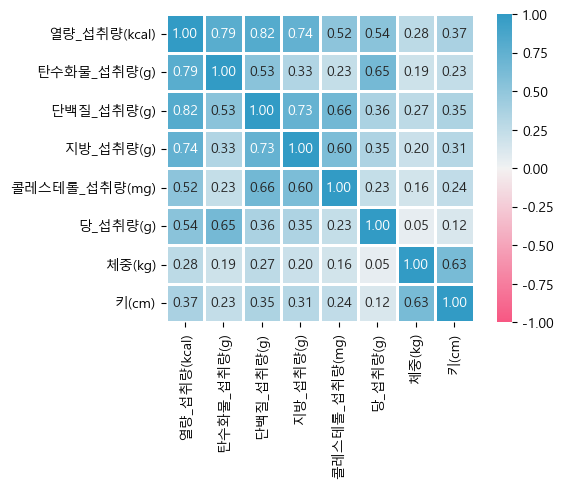

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

X = data[['열량_섭취량(kcal)', '탄수화물_섭취량(g)', '단백질_섭취량(g)',
          '지방_섭취량(g)', '콜레스테롤_섭취량(mg)', '당_섭취량(g)', '체중(kg)', '키(cm)']]

X_corr = X.corr(method='pearson')

cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

plt.rcParams["figure.figsize"] = (6,4)
sb.heatmap(X.corr(),
           annot = True,
           fmt=".2f",
           cmap = cmap,
           vmin = -1,
           vmax = 1,
           linewidths=1,
           square=True
          )

-----
상관계수를 확인한 결과, 0.82, 0.79, 0.73 등 높은 상관 계수를 보이는 변수들이 존재하므로 독립 변수들 간의 다중공선성을 의심해 볼 수 있다.

-----

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def cal_vif(x_n, y_n, visualize=False):

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(x_n)
    x_n = pd.DataFrame(X_scaled, columns=x_n.columns) #독립 변수들의 단위가 다르므로, VIF 를 계산하기 전에 표준화 해준다.

    X_train, X_test, y_train, y_test = train_test_split(x_n, y_n, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(x_n, i) for i in range(x_n.shape[1])]
    vif["features"] = x_n.columns

    print("독립 변수들의  VIF : ")
    print(vif)
    print("-------------------------------")

    print("비만 단계 예측 모델의 정확도 :", accuracy_score(y_test, y_pred))
    print("비만 단계 예측 모델의 R2-Score :", r2_score(y_test, y_pred))
    print()

    if visualize:
        ftr_importances_values = rf_model.feature_importances_
        ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
        ftr_top = ftr_importances.sort_values(ascending=False)
        
        print("-------------------------------")
        print("비만 단계 예측 모델에서 각 변수의 중요도 : ")
        print(ftr_top)
        print("-------------------------------")

        plt.figure(figsize=(5,5))
        sb.barplot(x=ftr_top, y=ftr_top.index)

        plt.xlabel('importance')
        plt.ylabel('features')
        plt.title("비만 단계 예측 모델에서 각 변수의 중요도")
        plt.show()

----
cal_vif 함수는 독립 변수 데이터 x_n과 종속 변수 데이터 y_n을 받은 후, 독립 변수를 표준화하고, 표준화된 독립변수들의 VIF를 출력한다.
더불어, x_n과 y_n을 사용하여 Random Forest 모델을 생성하고 해당 모델의 정확도와 R2-score를 출력해주는 기능을 한다.

visualize를 True로 설정하면, 비만 단계 예측 모델에서 각 변수의 중요도를 출력하고 시각한다.

----

In [6]:
cal_vif(X,y)

독립 변수들의  VIF : 
   VIF Factor       features
0   11.613411   열량_섭취량(kcal)
1    5.758978    탄수화물_섭취량(g)
2    4.217227     단백질_섭취량(g)
3    4.091155      지방_섭취량(g)
4    1.968724  콜레스테롤_섭취량(mg)
5    1.867254       당_섭취량(g)
6    1.676547         체중(kg)
7    1.791740          키(cm)
-------------------------------
비만 단계 예측 모델의 정확도 : 0.7845360824742268
비만 단계 예측 모델의 R2-Score : 0.2812241844502198



----
결과를 보면, 열량 섭취량의 VIF가 11.613411로 꽤 높게 나타났다.

다중공선성을 낮추기 위해, VIF가 가장 높게 나타낸 열량 섭취량을 제거하고 다시 VIF를 계산했다.

----

독립 변수들의  VIF : 
   VIF Factor       features
0    2.284229    탄수화물_섭취량(g)
1    3.439602     단백질_섭취량(g)
2    2.382807      지방_섭취량(g)
3    1.967199  콜레스테롤_섭취량(mg)
4    1.844900       당_섭취량(g)
5    1.673033         체중(kg)
6    1.782880          키(cm)
-------------------------------
비만 단계 예측 모델의 정확도 : 0.7804123711340206
비만 단계 예측 모델의 R2-Score : 0.26746770951146803

-------------------------------
비만 단계 예측 모델에서 각 변수의 중요도 : 
체중(kg)           0.713932
키(cm)            0.139097
단백질_섭취량(g)       0.038266
탄수화물_섭취량(g)      0.034355
당_섭취량(g)         0.030165
콜레스테롤_섭취량(mg)    0.023535
지방_섭취량(g)        0.020650
dtype: float64
-------------------------------


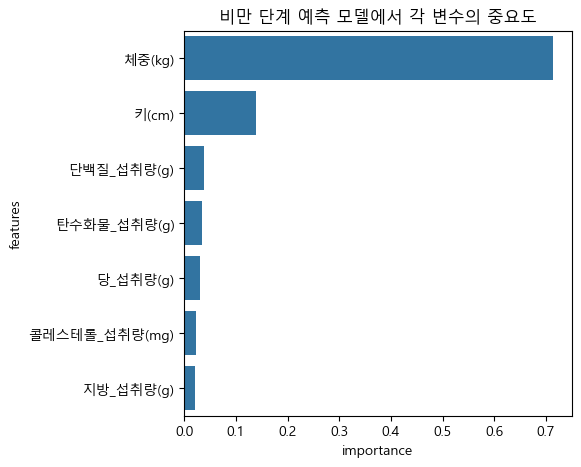

In [7]:
X_2 = data[['탄수화물_섭취량(g)', '단백질_섭취량(g)','지방_섭취량(g)',
            '콜레스테롤_섭취량(mg)', '당_섭취량(g)', '체중(kg)', '키(cm)']]
y_2 = data['비만_단계']

cal_vif(X_2,y_2,visualize=True)

----
VIF가 가장 높았던 열량 섭취량을 제거하고나서, 독립 변수들의 다중공선성이 감소한 것을 확인할 수 있다.<br>
이와 동시에 비만 단계 예측 모델의 정확도와 R2-Score도 낮아진 것으로 나타나는데, 이것은, 제거한 변수가 모델에 유용한 정보를 제공하고 있었다는 것을 의미한다.

정확도와 R2-scroe가 크게 감소하지 않았으므로, 다중공선성을 줄이는 것을 우선적으로 고려하여 그대로 변수를 제거하였다.


위 그래프를 통해 영양소 섭취량, 체중, 키를 활용하여 비만의 단계를 예측하는 모델에서, 체중이 가장 중요한 변수로서 강한 영향력을 보이고 있다는 것을 알 수 있다.<br>
그러나 모델에서, 체중 변수가 지나치게 중요하다는 점이 다소 우려스럽기에, 체중 변수를 제거한 후 다시 모델을 학습시켜 보았다. 아래는 그 결과이다.

----

독립 변수들의  VIF : 
   VIF Factor       features
0    2.277894    탄수화물_섭취량(g)
1    3.426207     단백질_섭취량(g)
2    2.379896      지방_섭취량(g)
3    1.966699  콜레스테롤_섭취량(mg)
4    1.835610       당_섭취량(g)
5    1.164820          키(cm)
-------------------------------
비만 단계 예측 모델의 정확도 : 0.5927835051546392
비만 단계 예측 모델의 R2-Score : -0.35845190020173767

-------------------------------
비만 단계 예측 모델에서 각 변수의 중요도 : 
키(cm)            0.311348
단백질_섭취량(g)       0.243613
탄수화물_섭취량(g)      0.136513
콜레스테롤_섭취량(mg)    0.106286
당_섭취량(g)         0.103380
지방_섭취량(g)        0.098861
dtype: float64
-------------------------------


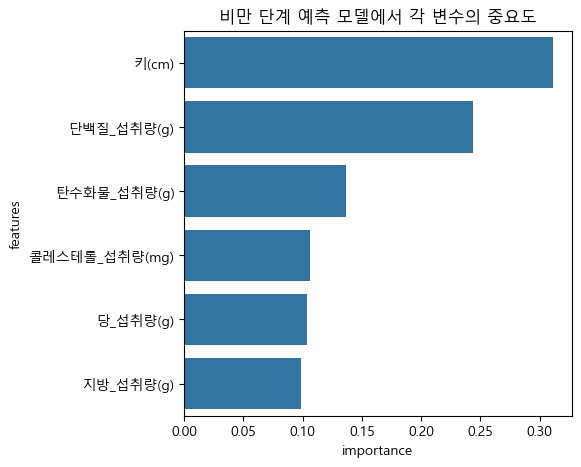

In [8]:
X_3 = data[['탄수화물_섭취량(g)','단백질_섭취량(g)', '지방_섭취량(g)',
            '콜레스테롤_섭취량(mg)', '당_섭취량(g)', '키(cm)']]
y_3 = data['비만_단계']

cal_vif(X_3, y_3, visualize=True)

----
체중이라는 변수를 하나 제거했을 뿐인데, 정확도가 약 0.2나 감소하였고, 0.3에 근접하던 R2-Score가 음수가 된 걸 확인할 수 있다.<br>
이는, 주요 영양소 섭취량과 체중, 키를 활용하여 비만 단계를 예측하는 분류 모델에서 사실상 영양소와 키의 영향은 거의 없고, 대신 체중이 예측에 대부분의 영향을 미쳤다는 사실을 시사한다.

결과에 대해 추가적으로 확인하기 위해 비만 단계 대신, 비만의 정도를 직접적으로 나타내는 연속현 변수인 BMI를 예측하는 LinearRegression 모델을 설정하였다.<br>
해당 모델에서는 독립 변수로 체중을 그대로 두었을 때와, 체중을 제거했을 때를 비교하여 MAE, MSE, R2-Score를 평가하였다.

----

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_contain_weight = X_2.copy() #독립 변수로 체중을 포함.
y_bmi = data[['BMI']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_contain_weight) #독립 변수간에 단위가 다르므로 표준화를 시켜준다.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bmi, test_size=0.2, random_state=42)
# 선형 회귀 모델 학습
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 새로운 데이터에 대한 BMI 예측
predicted_bmi = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, predicted_bmi)
mse = mean_squared_error(y_test, predicted_bmi)

print("MAE : ", mae)
print("MSE : ", mse)
print("R2_score : ", r2_score(y_test, predicted_bmi))

MAE :  0.2913863962112548
MSE :  0.20215729003082514
R2_score :  0.9858095019034997


----
독립 변수에 체중을 포함시켰을 때 BMI를 예측한 결과는, MAE가 약 0.29, MSE가 약 0.20, R2-Score가 약 0.98 로 나타났다.<br>
결과를 통해 모델이 BMI를 아주 정확하게 예측하고 있음을 알 수 있다.

----

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_no_weight = X_3.copy() #독립 변수로 체중을 포함하지 않음
y_bmi = data[['BMI']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_weight) #독립 변수간에 단위가 다르므로 표준화를 시켜준다.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bmi, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 새로운 데이터에 대한 BMI 예측
predicted_bmi = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, predicted_bmi)
mse = mean_squared_error(y_test, predicted_bmi)

print("MAE : ", mae)
print("MSE : ", mse)
print("R2_score : ", r2_score(y_test, predicted_bmi))

MAE :  2.88931294306442
MSE :  14.280694316419671
R2_score :  -0.002438079195440812


----
독립 변수에서 체중을 제거한 후 BMI를 예측한 결과는, MAE가 약 2.89, MSE가 약 14.28, R2-Score가 약 -0.002 로 나타났다.<br>
앞서 Random Forest 모델에서 체중을 제거하였을 때와 비슷하게, 독립 변수에서 체중을 제거하였을 때 BMI를 잘 예측하지 못하고 있음을 확인할 수 있다.<br>
이는, 비만의 정도와 아주 밀접한 관련이 있는 BMI를 예측하는 데 있어서, 영양소 섭취량과 키만으로는 설명력이 부족하다는 것을 의미한다.

----

### **결론**

- 가설 검증 결과, 주요 영양소 섭취량이 비만의 단계를 예측하는 데 큰 영향을 주지 않는다는 사실을 확인하였다.
비만의 정도를 예측하는데 있어서 칼로리, 콜레스테롤, 단백질, 지방, 탄수화물, 당의 섭취량이 예상보다 미미한 영향을 미치는 것으로 나타났다.

- 예상과는 달리, 영양소 섭취량보다는 체중이 비만의 정도를 예측하는 데 더 중요한 역할을 한 것으로 나타났다. 이로써 영양소 섭취량보다는 체중과 관련된 지표가 비만의 정도를 더욱 잘 예측할 수 있다는 결론을 내릴 수 있다. 이와 같은 결론으로부터, 영양소 섭취량이 많을 수록 비만일 가능성이 높을 것이라는 초기 가설은 부정된다.

- 영양소 섭취량만을 통해 비만을 예측하는 것은 불가능하지는 않지만, 그 정확도와 설명력이 낮은 것으로 나타났다. 이를 통해, 비만을 관리하기 위해서는 영양소 섭취량보다는 체중과 관련이 있는 지표들에 더욱 주목해야 한다는 것을 알 수 있다.
또한, 개별적인 영양소 섭취량이 비만의 정도를 예측하는 데 미치는 영향이 적다는 점을 고려하여, 비만을 관리하는 데 있어서 식습관보다는 운동이나 생활 습관 개선 등 종합적인 관리를 통한 체중 관리가 더욱 중요할 수 있음을 알 수 있다.

## **가설 2 :**
비만과 관련된 질병을 판단할 때 중요한 생리학적 지표(체중, 혈압, 혈당)들 간에는 서로 연관성이 있을 것으로 예상된다. 또한, 생리학적 지표와 개인의 생활 습관(운동 빈도, 지방 섭취량, 흡연량)이 개인의 건강 상태에 영향을 미칠 것으로 가정할 때, 이러한 요인들을 종합적으로 분석하면 건강한 생활 습관을 가진 사람들이 건강 상태가 더 좋을 것으로 예상된다. 따라서, 이 분석을 통해 생리학적 지표와 생활 습관 간의 상호 관련성을 파악하고, 개인의 건강 상태를 개선할 수 있는 방안을 도출할 수 있을 것으로 기대한다.

In [11]:
import pandas as pd

data = pd.read_excel("health_data.xlsx")

In [12]:
cdata = data.copy()[['체중(kg)', '수축기_혈압', '이완기_혈압', '공복_혈당(mg/dL)', '총콜레스테롤(mg/dL)']]
cdata['평균_혈압'] = (cdata['수축기_혈압'] + cdata['이완기_혈압']) / 2 #수축기 혈압과 이완기 혈압의 평균으로 평균_혈압 데이터를 생성하였다.

df_ps = cdata[['체중(kg)', '평균_혈압', '공복_혈당(mg/dL)','총콜레스테롤(mg/dL)']]

df_ps = df_ps.fillna(df_ps.mean()) #결측치를 평균으로 대체하였다.

----

비만과 관련이 있다고 알려진 병으로는 대표적으로 고혈압, 당뇨병, 이상지질혈증 등이 있다.<br>
따라서, 해당 병들과 관련이 있는 생리학적 지표인 평균 혈압, 공복 혈당, 총콜레스테롤 수치 데이터를 불러왔다.

아래는 체중, 평균 혈압, 공복 혈당, 총콜레스테롤 수치를 바탕으로 클러스터링을 하는 코드이다.

----

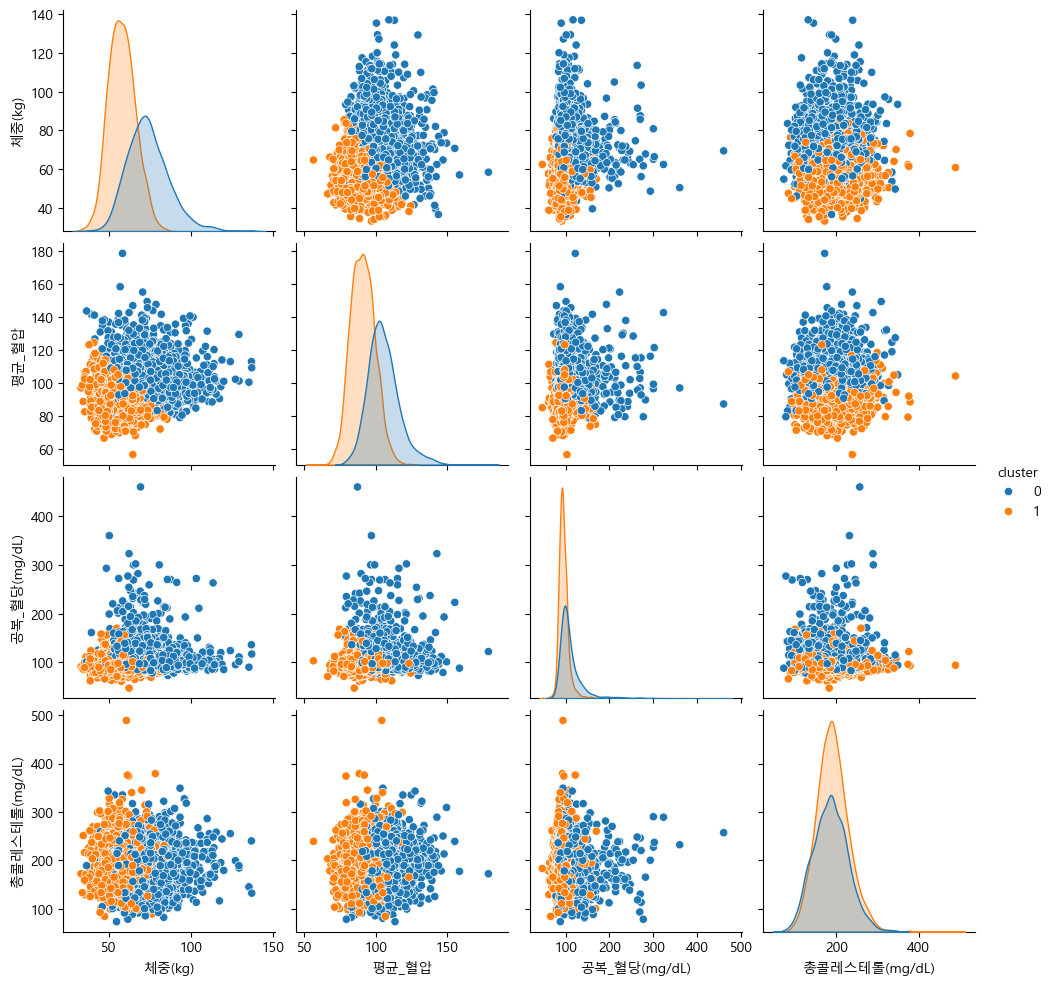

In [13]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df_ps_c1 = df_ps.copy()

scaler = StandardScaler()
df_ps_c1_scaled = scaler.fit_transform(df_ps_c1)

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(df_ps_c1_scaled)

df_ps_c1['cluster'] = kmeans.labels_

# 클러스터별 데이터 시각화
sb.pairplot(df_ps_c1, hue='cluster', vars=['체중(kg)', '평균_혈압', '공복_혈당(mg/dL)','총콜레스테롤(mg/dL)'])
plt.show()

----

위 그래프를 통해 체중이 높은 집단과 낮은 집단 간에 다음과 같은 경향이 있음을 확인할 수 있다.

1. 체중이 높은 집단은 체중이 낮은 집단보다 상대적으로 평균 혈압이 더 높다.
2. 체중이 높은 집단에서는 체중이 낮은 집단보다 공복 혈당 수치가 상대적으로 더 높게 측정된다.
3. 이와 마찬가지로, 평균 혈압이 높은 집단에서는 상대적으로 공복 혈당과 체중이 높게 측정되는 경향이 있다.


이러한 결과는 체중과 혈압, 공복 혈당 간에 어느 정도의 관련성이 있음을 시사한다.<br>
특히, 체중이 높은 집단에서는 공복 혈당과 평균 혈압이 더 높게 측정되는 경향이 있으며, 이는 비만과 관련된 대사 이상의 가능성을 시사한다.

그러나 총콜레스테롤 수치는, 체중·평균 혈압·공복 혈당이 높은 집단과 낮은 집단에서 비슷하게 측정되는 경향이 있다.<br>
이는, 총콜레스테롤과 다른 변수들 간의 상관관계가 유의미하게 강하지 않음을 의미한다. 아래의 코드를 통해 총콜레스테롤이 다른 변수들과 상관관계가 매우 낮음을 확인할 수 있다. <br>
이러한 결과는 총콜레스테롤이 해당 분석에서 설정한 다른 건강 지표들과는 별개의 요인으로 작용할 가능성이 있음을 시사한다.

----

In [14]:
correlation_matrix = df_ps_c1.drop(columns=['cluster']).corr()

# 총콜레스테롤과 다른 변수들 간의 상관관계를 출력
print("총콜레스테롤과 다른 변수들 간의 상관관계 :\n")
print(correlation_matrix['총콜레스테롤(mg/dL)'].sort_values(ascending=False))

총콜레스테롤과 다른 변수들 간의 상관관계 :

총콜레스테롤(mg/dL)    1.000000
평균_혈압            0.062942
체중(kg)           0.007361
공복_혈당(mg/dL)    -0.059257
Name: 총콜레스테롤(mg/dL), dtype: float64


,체중(kg),평균_혈압,공복_혈당(mg/dL),총콜레스테롤(mg/dL)
cluster,,,,
0,73.930335,105.370805,110.311816,185.943290
1,57.960559,90.811469,94.880815,190.998764


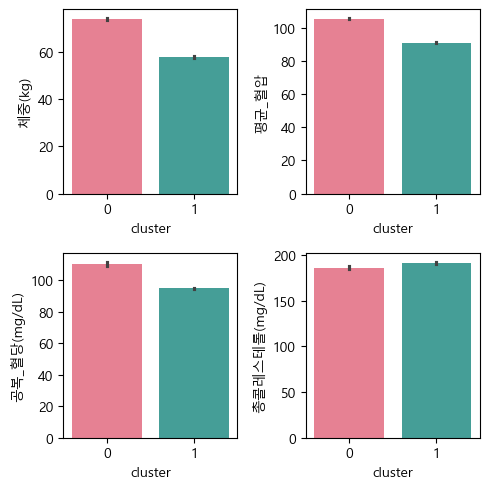

In [15]:
cluster_means = df_ps_c1.groupby('cluster').mean()
display(cluster_means)

# 각 클러스터별 건강 관련 특성 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
axes = axes.flatten()
for i, col in enumerate(df_ps_c1.columns[:-1]):
    sb.barplot(x='cluster', y=col, hue='cluster', data=df_ps_c1, ax=axes[i], palette='husl', legend=False)
plt.tight_layout()
plt.show()

----
위의 표는, cluster_0 과 cluster_1 각각에서의 체중, 평균 혈압, 공복 혈당, 총콜레스테롤의 평균을 나타내는 표이다.

그래프를 보면, 앞서 언급했듯이 cluster_0 이 cluster 1 에 비해 체중, 평균 혈압, 공복 혈당이 모두 높은 것을 확인할 수 있다.<br>
그에 반해, 총콜레스테롤은 오히려 cluster_1 에서 더 높게 나타나는 것을 확인할 수 있다.

----

In [16]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import numpy as np

print("실루엣 스코어 :", silhouette_score(df_ps_c1_scaled, kmeans.fit_predict(df_ps_c1_scaled)))

실루엣 스코어 : 0.23444297998219865


----
앞서 했던 클러스터링의 품질을 평가하기 위한 척도로 실루엣 스코어를 사용하였는데, 실루엣 스코어가 0.23 으로 다소 낮게 측정되었다.<br>
이 스코어는 클러스터 내의 데이터가 완전히 잘 응집되어 있지 않고, 클러스터 간 완벽한 분리가 이루어지지 않았음을 나타낸다.<br>
그럼에도 불구하고, 어느 정도 클러스터링이 데이터 내의 패턴을 구분해내고 있다는 것을 의미한다.

실루엣 스코어가 낮게 나왔기 때문에, 데이터를 압축하면서도 클러스터링의 성능을 더 향상시키기 위해 주성분 분석을 하였다.

----

주성분 별 설명 분산 비율 : [0.34116792 0.25889472]
-------------------------------------------------


,체중(kg),평균_혈압,공복_혈당(mg/dL),총콜레스테롤(mg/dL)
0,0.578461,0.622463,0.526111,0.033623
1,0.052936,0.190615,-0.342426,0.918482


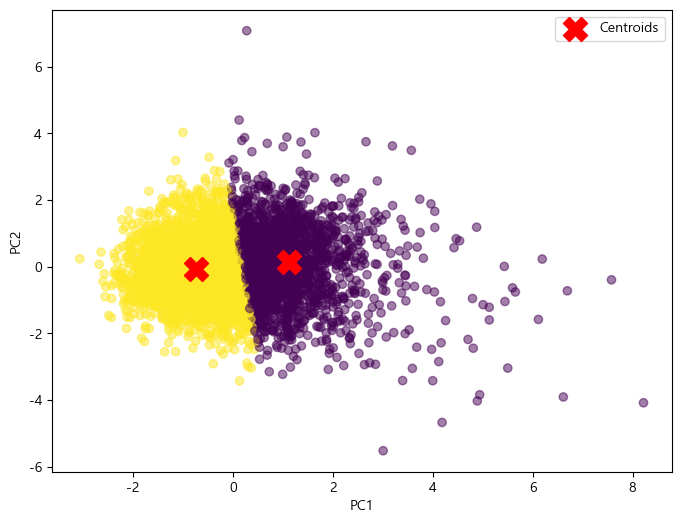

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_ps_c2 = df_ps.copy()
df_ps_c2_scaled = scaler.fit_transform(df_ps_c2)

pca = PCA(n_components=2)
pca = pca.fit(df_ps_c2_scaled)

print("주성분 별 설명 분산 비율 :", pca.explained_variance_ratio_)
print("-------------------------------------------------")

pca_transformed = pca.transform(df_ps_c2_scaled)

df_pca = pd.DataFrame(pca_transformed,columns=['PC1','PC2'])

components_df = pd.DataFrame(pca.components_, columns=df_ps_c2.columns)
display(components_df)

kmeans_pca = KMeans(n_clusters = 2, random_state=42)
kmeans_pca.fit(df_pca)

centroids_pca = kmeans_pca.cluster_centers_

# 클러스터별 데이터 시각화

plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmeans_pca.labels_, cmap='viridis', alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

----
주성분 별 설명 분산 비율은 각 주성분이 전체 데이터의 분산을 얼마나 설명하는지를 나타낸다.<br>
주성분 PC1 는 전체 데이터의 약 34.12% 의 분산을 설명하고, PC2 는 전체 데이터의 약 25.89% 의 분산을 설명한다는 의미이다.<br>
PC1 과 PC2 를 합치면 전체 데이터의 약 60% 의 분산을 설명할 수 있다는 것은, 전체 데이터의 변동성 중 상당 부분을 설명하고 있으며, 주성분 분석이 충분한 설명력을 가지고 있다는 것을 의미한다.

표를 보면, PC1 은 평균 혈압이 가장 큰 가중치를 가지고 있음을 알 수 있다. 또한, 체중과 공복 혈당 역시 유의미한 가중치를 가지고 있으며, 총콜레스테롤은 비교적 작은 가중치를 가지고 있다. 이를 통해 PC1 은 혈압이 높고 체중과 공복 혈당이 높은 사람들을 나타내는 경향이 있으며, 총콜레스테롤은 상대적으로 중요하지 않은 요소라는 것을 알 수 있다.

PC2 의 경우, 공복 혈당과 총콜레스테롤이 유의미한 가중치를 가지고 있다. 이는 PC2 가 총콜레스테롤과 공복 혈당 간의 관계를 중심으로 설명 된다는 것이다. 체중과 평균 혈압은 비교적 낮은 가중치를 가지고 있기 때문에, PC2 에서는 상대적으로 중요하지 않은 변수라는 것을 알 수 있다.

주성분 분석 결과를 토대로 해석을 해보면,

1. PC1:<br>
PC1 은 체중, 평균 혈압, 공복 혈당과 관련된 요소를 주로 설명한다.<br>
<t>- 체중, 평균 혈압, 공복 혈당은 주로 대사 관련 요소로 알려져 있으며, 이들 간에는 상호 연관성이 있을 것으로 예상된다.<br>
<t>- PC1 이 높은 값을 가지는 데이터는 체중이 높고 혈압 및 공복 혈당이 상대적으로 높은 경우일 것이다.<br>
<t>- 총콜레스테롤은 PC1 과의 관련성이 상대적으로 낮다고 해석된다.

2. PC2:<br>
PC2 는 총콜레스테롤과 공복 혈당과 관련된 요소를 주로 설명한다.<br>
<t>- 총콜레스테롤과 공복 혈당은 혈중 지질 및 혈당 수준을 나타내는 요소로, 이들 간에도 상호 연광성이 있을 것으로 예상되지만, 총콜레스테롤의 가중치가 약 0.92 로 매우 크므로 거의 총콜레스테롤 수치에 영향을 받는다고 볼 수 있다.<br>
<t>- 공복 혈당은 PC2 와 음의 상관관계를 가지기 때문에, PC2 가 높은 값을 가지는 데이터는 총콜레스테롤이 높고, 공복 혈당이 상대적으로 낮은 경우일 것이다.<br>
<t>- 체중과 평균 혈압은 PC2 와의 관련성이 상대적으로 낮다고 해석된다.

결론적으로, PC1 은 대사 관련 요소를 주로 설명하고, PC2 는 혈중 지질 및 혈당 수준과 관련된 요소를 주로 설명한다는 것을 알 수 있다.<br>
주어진 데이터셋에 대해 체중, 혈압, 공복 혈당과 같은 건강 관련 요소들이 서로 연관되어 있음을 확인할 수 있다.<br>
또한, 총콜레스테롤은 이러한 요소들과 상대적으로 연관성이 낮다는 것을 알 수 있다.

----

In [18]:
print("주성분 분석 전 실루엣 스코어 :", silhouette_score(df_ps_c1_scaled, kmeans.fit_predict(df_ps_c1_scaled)))
print("주성분 분석 후 실루엣 스코어 :", silhouette_score(df_pca, kmeans_pca.fit_predict(df_pca)))

주성분 분석 전 실루엣 스코어 : 0.23444297998219865
주성분 분석 후 실루엣 스코어 : 0.3427503828434516


----
실루엣 스코어를 이용하여 주성분 분석을 하기 전의 클러스터링의 결과와 주성분 분석을 한 후의 클러스터링 결과를 비교했다.<br>
주성분 분석 후의 실루엣 스코어가 0.343 이 되었다는 것은 클러스터링 결과가 양호하다는 것을 의미하며, 주성분 분석을 통한 차원 축소가 클러스터링 성능을 개선하는 데 효과적이었다고 볼 수 있다.

----

----
다음으로, 생활습관이 건강에 미치는 영향에 대한 분석을 진행하였다.

----

In [19]:
import pandas as pd

data = pd.read_excel('health_data.xlsx')

----

생활 습관이 건강에 어떤 영향을 주는 지에 대해 분석하기 위해,<br>
생활 습관 지표로 [ 지방 섭취량, 주중 수면 시간, 주당 근력 운동을 하는 일 수, 하루 흡연량 ] 을,<br>
건강을 나타내는 지표로 [ BMI, 수축기 혈압, 총콜레스테롤, 당화혈색소 ] 를 불러왔다.

----

In [20]:
df_life = data[['지방_섭취량(g)', '주중_수면_시간(h)' , '주당_근력_운동_횟수', '하루_흡연량']]

df_ind = data[['BMI', '수축기_혈압', '총콜레스테롤(mg/dL)', '당화혈색소(%)']]

sleep_time_mean = df_life['주중_수면_시간(h)'].mean().astype('int64')
exer_time_mean = df_life['주당_근력_운동_횟수'].mean().astype('int64')

df_life.loc[df_life['주당_근력_운동_횟수'].isin([9]), '주당_근력_운동_횟수'] = exer_time_mean        #제대로 응답하지 않은 데이터에 대해
df_life.loc[df_life['주중_수면_시간(h)'].isin([88, 99]), '주중_수면_시간(h)'] = sleep_time_mean     #해당 열의 평균값을 대체.
df_life.loc[df_life['하루_흡연량'].isin([888,999]), '하루_흡연량'] = 0
df_life = df_life.fillna(df_life.mean()) #결측치를 평균으로 대체
df_ind = df_ind.fillna(df_ind.mean())

display(df_life)

,지방_섭취량(g),주중_수면_시간(h),주당_근력_운동_횟수,하루_흡연량
0,52.769562,7,0,0
1,27.315302,5,1,0
2,54.627219,6,3,20
3,97.806098,7,0,5
4,33.335840,6,0,0
...,...,...,...,...
4841,23.901635,8,0,0
4842,35.845626,7,0,0
4843,44.880529,8,1,0
4844,36.920535,8,5,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df_life = df_life.copy()

scaler = StandardScaler()
df_life_scaled = scaler.fit_transform(df_life)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df_life_scaled) 

df_life['cluster'] = kmeans.labels_

# 클러스터별 데이터 시각화
sns.pairplot(df_life, hue='cluster', vars=['지방_섭취량(g)', '주중_수면_시간(h)', '주당_근력_운동_횟수', '하루_흡연량'])
plt.show()

----

위 그래프는 생활 습관 지표들을 K-means Algorithm을 이용하여 클러스터링 하여 나타낸 결과이다. 생활 습관들 간에는 특정 패턴이 나타나지 않음을 확인할 수 있다.

생환 습관 지표를 클러스터링 한 후 생긴 각 클러스터에서, 건강 지표가 어떻게 나타나는지 분석하기 위해 두 개의 데이터를 합쳤다.

----

In [ ]:
df_life_ind = pd.concat([df_life, df_ind], axis=1)
display(df_life_ind)

In [ ]:
from sklearn.metrics import silhouette_score

print("실루엣 스코어 :", silhouette_score(df_life_scaled, kmeans.fit_predict(df_life_scaled)))

In [ ]:
# 각 클러스터별 특성 확인
cluster_means = df_life_ind.groupby('cluster').mean()
display(cluster_means)

# 각 클러스터별 건강 관련 특성 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
axes = axes.flatten()
for i, col in enumerate(df_life_ind.columns[5:]):
    sns.barplot(x='cluster', y=col, hue='cluster',data=df_life_ind, ax=axes[i], palette='deep', legend=False)
    
plt.tight_layout()
plt.show()

----
위 표와 그래프를 통해 다음과 같은 결과를 도출해낼 수 있다.

1. 지방 섭취량이 가장 많은 cluster 3 에서 평균 총콜레스테롤 수치가 가장 높은 것을 확인할 수 있다. 이는 총콜레스테롤 수치가 지방 섭취량과 관련이 있다는 것을 의미한다.<br>
2. 1주일 당 근력 운동을 가장 많이 하는 cluster 1 에서 평균 BMI 수치가 가장 낮은 것을 확인할 수 있다. BMI는 비만도를 나타내는 관련된 지표로서, 운동을 통해서 비만을 관리할 수 있음 의미한다.<br>
3. 하루 흡연량이 가장 많은 cluster 2 에서 평균 수축기 혈압이 가장 높게 나타난 것을 확인할 수 있다. 이를 통해 흡연량과 혈압이 어느 정도 관련이 있다는 것을 알 수 있다.

생활 습관 지표 중, 앞서 언급한 세 가지 지표는 건강 지표와의 연관성을 확인할 수 있었지만, 주중 수면 시간은 건강 지표들과의 연관성을 찾지 못하였다.<br>
따라서 수면 시간 대신, 당화혈색소에 더 직접적인 영향을 준다고 알려진 당 섭취량을 생활 습관 지표에 추가하여, 다시 분석을 진행하였다.


----

In [ ]:
df_life_2 = data[['지방_섭취량(g)','당_섭취량(g)','주당_근력_운동_횟수', '하루_흡연량']]

exer_time_mean = df_life_2['주당_근력_운동_횟수'].mean().astype('int64')

df_life_2.loc[df_life_2['주당_근력_운동_횟수'].isin([9]), '주당_근력_운동_횟수'] = exer_time_mean       #제대로 응답하지 않은 데이터에 대해
df_life_2.loc[df_life_2['하루_흡연량'].isin([888,999]), '하루_흡연량'] = 0                              #평균과 0으로 대체하였다.
df_life_2 = df_life_2.fillna(df_life_2.mean())  #결측치를 평균으로 대체히였다.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df_life_2 = df_life_2.copy()

scaler = StandardScaler()
df_life_2_scaled = scaler.fit_transform(df_life_2)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df_life_2_scaled) 

df_life_2['cluster'] = kmeans.labels_

In [ ]:
df_life_2_ind = pd.concat([df_life_2, df_ind], axis=1)
display(df_life_2_ind)

In [ ]:
# 각 클러스터별 특성 확인
cluster_means = df_life_2_ind.groupby('cluster').mean()
display(cluster_means)

# 각 클러스터별 건강 관련 특성 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
axes = axes.flatten()
for i, col in enumerate(df_life_2_ind.columns[5:]):
    sns.barplot(x='cluster', y=col, hue='cluster',data=df_life_2_ind, ax=axes[i], palette='deep', legend=False)
    
plt.tight_layout()
plt.show()

----
위 표와 그래프는 생활 습관 지표에서, 주중 수면 시간을 당 섭취량으로 바꾼 후의 분석 결과이다.

앞선 분석과 비슷하게 지방 섭취량이 가장 많은 cluster 1이 평균 총콜레스테롤 수치가 가장 높고, 주당 근력 운동 횟수가 가장 많은 cluster 0이 평균 BMI가 가장 낮았다. 또한, 흡연량이 가장 많은 cluster 3에서 수축기 혈압도 가장 높았다.

이 분석에서 두 가지 의문점이 생겼다.
1. 당화혈색소는 당 섭취량과 큰 연관이 있다고 알려져있다. 그런데 분석 결과를 보면 cluster 2 에서 평균 당 섭취량이 가장 높지만, 당화혈색소는 가장 낮은 것으로 나타난다.<br>
2. 여러 연구 결과에서 흡연량과 고혈압이 강한 연관성을 가지고 있다고 알려져있다. 그런데, 클러스터 간에 흡연량의 차이가 꽤 나는데도 불구하고 수축기 혈압의 차이는 크게 나지 않는다.

이런 결과에 대해 확인하기 위해 다른 변수들과의 상호작용을 배제하고 (당 섭취량과 당화혈색소) 과 (흡연량과 수축기 혈압) 만 따로 추출하여 클러스터링을 진행해 보았다.

----

다음은, 당 섭취량과 당화혈색소를 클러스터링하는 코드이다.

----

In [ ]:
from sklearn.preprocessing import StandardScaler

df_life_3= data[['당_섭취량(g)', '당화혈색소(%)']]

df_life_3 = df_life_3.fillna(df_life_3.mean()) #결측치를 평균으로 대체

scaler = StandardScaler()
df_life_3_scaled = scaler.fit_transform(df_life_3)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_life_3_scaled)

df_life_3['cluster'] = kmeans.labels_

# 클러스터별 데이터 시각화
sns.pairplot(df_life_3, hue='cluster', vars=['당_섭취량(g)','당화혈색소(%)'])
plt.show()

In [ ]:
# 각 클러스터별 특성 확인
cluster_means = df_life_3.groupby('cluster').mean()
display(cluster_means)

# 각 클러스터별 건강 관련 특성 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes = axes.flatten()
for i, col in enumerate(df_life_3.columns[:-1]):
    sns.barplot(x='cluster', y=col, hue='cluster', data=df_life_3, ax=axes[i], palette='deep', legend=False)
plt.tight_layout()
plt.show()

----
당화혈색소는 당 섭취량에 영향을 받는다고 알려져있다. 하지만, 해당 분석에서는 다른 변수와의 상호작용을 배제한 후에도 당 섭취량이 낮은 cluster 0 이 오히려 당화혈색소가 조금 더 높게 나타났다. 이런 결과가 나온 이유는 크게 두 가지로 예상된다.

1. 당화혈색소는 최근 2~3 개월 동안의 혈당 수치를 반영하는 지표인데, 분석에 이용된 당 섭취량은 그에 비해 측정된 기간이 짧으므로 온전히 반영되기 힘들 수 있다.
2. 인슐린 저항성이 높을 때, 당 섭취량이 낮아도 당화혈색소가 높을 수 있다. 인슐린이 포도당을 적절하게 처리하지 못해서 당을 별로 섭취하지 않아도 혈중 포도당 농도가 상승하여 당화혈색소도 높아질 수 있다. 이 분석에서는 인슐린 저항성을 고려하지 않기 때문에 이런 결과가 나올 수 있다.

이처럼 당화혈색소는 당 섭취량 뿐만 아니라 다른 건강 상태와 관련된 여러 요소에 영향을 받기 때문에, 당 섭취량만으로는 파악하는데 한계가 있다. 따라서 이와 관련된 다른 요인들에 대한 추가적인 분석이 필요하다.

----

다음은, 하루 흡연량과 수축기 혈압을 클러스터링하는 코드이다.

----

In [ ]:
df_life_4= data[['하루_흡연량', '수축기_혈압']]

df_life_4.loc[df_life_4['하루_흡연량'].isin([888,999]), '하루_흡연량'] = 0
df_life_4 = df_life_4.fillna(df_life_4.mean()) #결측치를 평균으로 대체

# 클러스터 수 결정 (일반적으로 Elbow Method 사용)
scaler = StandardScaler()
df_life_4_scaled = scaler.fit_transform(df_life_4)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_life_4_scaled)

df_life_4['cluster'] = kmeans.labels_

# 클러스터별 데이터 시각화
sns.pairplot(df_life_4, hue='cluster', vars=['수축기_혈압','하루_흡연량'])
plt.show()

In [ ]:
# 각 클러스터별 특성 확인
cluster_means = df_life_4.groupby('cluster').mean()
display(cluster_means)

# 각 클러스터별 건강 관련 특성 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes = axes.flatten()
for i, col in enumerate(df_life_4.columns[:-1]):
    sns.barplot(x='cluster', y=col, hue='cluster', data=df_life_4, ax=axes[i], palette='deep', legend=False)
plt.tight_layout()
plt.show()

----
하루 흡연량과 수축기 혈압만을 클러스터링 한 결과, 앞선 분석과는 조금 다른 결과가 나타났다.<br>
앞선 분석에서는 클러스터간에 평균 흡연량의 차이가 컸음에도 평균 수축기 혈압은 큰 차이 없이 나타났다.<br>
하지만, 다른 요소를 고려하지 않았을 때 흡연량이 높은 집단과 낮은 집단에서 수축기 혈압에서 유의미한 차이를 보였다. 이를 통해, 흡연량이 수축기 혈압과 연관성이 있다는 것을 알 수 있다.

----

### **결론**

- 체중이 높은 집단에서는 공복 혈당과 평균 혈압이 더 높게 측정되는 경향이 있으며, 이는 비만과 관련된 대사 이상의 가능성을 시사한다.<br>
- 그러나 총콜레스테롤 수치는, 체중·평균 혈압·공복 혈당이 높은 집단과 낮은 집단에서 비슷하게 측정되는 경향이 있다. 이는, 총콜레스테롤과 체중·평균 혈압·공복 혈당의 상관관계가 유의미하게 강하지 않음을 의미한다.<br>
- 클러스터 간에 지방 섭취량은 꽤 차이가 있지만, 비만의 지표로 사용되는 BMI는 클러스터 간에 별 차이가 없음을 알 수 있다. 가설 1에서 확인할 수 있었듯 주요 영양소 섭취량은 비만을 판단하는 데에 크게 작용하지 않는다는 것을 확인할 수 있다.
- 생활 습관 지표를 클러스터링 한 결과, 지방 섭취량이 높은 집단에서 총콜레스테롤이 높게 나타나는 경향이 있다.
- 또한, 근력 운동을 하는 횟수가 많은 집단일수록 BMI가 조금 더 낮게 나타나는 경향이 있다.
- 짧은 기간동안 얻은 당 섭취량 데이터로는 당화혈색소와 당 섭취량의 유의미한 관계를 발견하지 못하였다. 또한, 당화혈색소는 인슐린 저항성 등 다른 건강 상태와 관련된 요인들의 영향을 많이 받기 때문에, 이에 대한 추가적인 분석이 필요하다.
- 다른 변수들과의 상호작용을 배제하고, 흡연량과 수축기 혈압을 바탕으로 클러스터링을 진행하였을 때, 흡연량의 평균이 높은 집단에서 수축기 혈압의 평균도 높다는 것을 알 수 있다. 이는 흡연량과 고혈압이 연관성이 있다는 것을 나타낸다.


<br>이 결론을 통해 얻을 수 있는 주요 인사이트는 다음과 같다.
1. 체중이 높은 집단에서 공복 혈당과 평균 혈압이 높게 나타나는 경향을 보임으로써, 비만이 대사 이상과 관련 있을 가능성을 시사한다. 이는 비만 관리가 단순히 체중 감량에 국한되지 않고, 혈당과 혈압 조절을 포함한 종합적인 관리가 필요함을 강조한다.
3. 주요 영양소 섭취량이 비만의 지표인 BMI와 큰 연관성이 없다는 것은, 비만 관리 전략에서 단순 영양소 섭취량 조절보다는 다른 요인들, 예를 들어 운동이나 생활습관 개선에 더 주목해야할 필요가 있음을 시사한다.
4. 근력 운동을 더 자주 하는 집단이 BMI가 낮게 나타난다는 점은, 규칙적인 근력 운동이 비만 관리에 긍정적인 영향을 줄 수 있음을 보여준다.
5. 흡연량이 높은 집단에서 수축기 혈압이 높게 나타나는 경향은 흡연과 고혈압 사이의 연관성을 강조하며, 흡연 감소가 고혈압 관리에 중요할 수 있음을 시사한다.

## **가설 3 :**
혈압, 당화혈색소, 콜레스테롤 등 생리학적 지표와 당뇨병, 고혈압, 비만, 이상지질혈증의 발병률에는 통계적으로 유의미한 관령성이 있을 것이다. 또한, 이런 생리학적 지표들을 통하여 각 질병의 유병 유무를 예측할 수 있을 것이다.

In [ ]:
import pandas as pd

data = pd.read_excel('health_data.xlsx')

----
데이터셋에서 생리학적 지표(BMI, 수축기 혈압, 당화혈색소, 총콜레스테롤, 허리 둘레) 데이터와, 해당 지표들과 관련된 질병 유병 여부에 대한 데이터를 불러왔다.<br>
당뇨병이나 이상지질혈증의 유병 여부에 대해서 모른다거나, 대답하지 않은 응답자는 0(해당 질병이 없음)으로 처리하였다.<br>
기존 데이터셋에서 고혈압과 비만은 여려 단계로 구분되어 있었으나, 이를 단순화하여 유병 여부만을 나타내도록 변경하였다. 유병 상태는 1로, 무병 상태는 0으로 표기하였다.

----

In [ ]:
import numpy as np

df_health_indicators = data[['BMI', '수축기_혈압', '당화혈색소(%)', '총콜레스테롤(mg/dL)', '허리_둘레(cm)']]  #건강 지표를 나타낸다.
df_disease_status = data[['당뇨병_유병_여부', '고혈압_유병_여부', '비만_단계', '이상지질혈증_유병_여부']] #질병 유무를 나타낸다.

df_hs = pd.concat([df_health_indicators, df_disease_status], axis=1)
df_hs = df_hs.rename(columns={'비만_단계': '비만_유병_여부'})

df_hs.loc[df_hs['당뇨병_유병_여부'].isin([8,9]), '당뇨병_유병_여부'] = 0 #제대로 응답하지 않은 사람들은 0으로 대체.
df_hs.loc[df_hs['이상지질혈증_유병_여부'].isin([8,9]), '이상지질혈증_유병_여부'] = 0 #제대로 응답하지 않은 사람들은 0으로 대체.
df_hs['고혈압_유병_여부'] = np.where(df_hs['고혈압_유병_여부'] == 4, 1, 0) #1 ~4 로 나뉘어져 있던 단계를 0과 1로 합침.
df_hs['비만_유병_여부'] = np.where(df_hs['비만_유병_여부'] == 3, 1, 0)
df_hs = df_hs.fillna(df_hs.mean())

display(df_hs)

In [ ]:
from scipy.stats import ttest_ind

def compare_groups(df, health_indicator):
    high_group = df[df[health_indicator] > df[health_indicator].median()] 
    low_group = df[df[health_indicator] <= df[health_indicator].median()]

    rates_high = {}
    rates_low = {}

    for condition in ['당뇨병_유병_여부', '고혈압_유병_여부', '비만_유병_여부', '이상지질혈증_유병_여부']:
        rates_high[condition] = high_group[condition].mean()
        rates_low[condition] = low_group[condition].mean()

        t_statistic, p_value = ttest_ind(high_group[condition], low_group[condition])

        disease_name = condition.split('_')[0] # 질병의 이름을 가져온다.

        print(f"{health_indicator} 지표가 높은 그룹의 {disease_name} 발병률: {rates_high[condition]}")
        print(f"{health_indicator} 지표가 낮은 그룹의 {disease_name} 발병률: {rates_low[condition]}")
        print("T-Statistic:", t_statistic, ",", "P-Value:", p_value)
        print("---------------------------------------------------------")

----

compare_groups 함수는 파라미터로 df와 column_name를 받는다. df는 생리학적 지표와 질병 유병 여부가 담긴 DataFrame이고, health_indicator 은 생리학적 지표중 하나이다.<br>

함수의 주요 기능은 다음과 같다 :
1. 해당 지표의 중간 값보다 큰 수치를 가지고 있는 그룹을 high_group, 낮은 수치를 가지고 있는 그룹을 low_group 으로 설정하였다.<br>
2. 질병 유병 여부가 0과 1로만 표시되어 있으므로, 각 그룹에서 질병 유병 여부 열의 평균을 구해 해당 그룹의 발병률을 계산한다.<br>
3. 생리학적 지표가 높은 집단과 낮은 집단의 질병 유병 여부를 비교하기 위해 t-검정을 수행하여, 두 그룹 간 유병 여부에 통계적으로 유의미한 차이가 있는지 확인한다.

----

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def plot_disease_rates(df, health_indicator):
    high_group_rates = []
    low_group_rates = []

    for indicator in ['당뇨병_유병_여부', '고혈압_유병_여부', '비만_유병_여부', '이상지질혈증_유병_여부']:
        high_group = df[df_hs[health_indicator] > df[health_indicator].median()]
        low_group = df[df_hs[health_indicator] <= df[health_indicator].median()]

        high_group_rate = high_group[indicator].mean()
        low_group_rate = low_group[indicator].mean()

        high_group_rates.append(high_group_rate)
        low_group_rates.append(low_group_rate)

    # 그래프 설정
    bar_width = 0.35
    index = range(4)

    # 막대 그래프 그리기
    fig, ax = plt.subplots()
    bar1 = ax.bar(index, high_group_rates, bar_width, label='High Health Group')
    bar2 = ax.bar([i + bar_width for i in index], low_group_rates, bar_width, label='Low Health Group')

    # 라벨 및 제목 설정
    ax.set_xlabel('Health Indicators')
    ax.set_ylabel('Disease Rate')
    ax.set_title(f'Disease Rates by {health_indicator}')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(['Diabetes', 'Hypertension', 'Obesity', 'dyslipidemia'])
    ax.legend()

    # 그래프 표시
    plt.show()

----
plot_disease_rates 함수는 compare_groups 함수와 같은 파라미터를 받아서, 특정 생리학적 지표(health_indicator)를 기준으로 나누어진 두 그룹의 질병 발병률을 막대 그래프로 시각화하는 함수이다. 대해 시각화를 하는 함수이다.

----

In [ ]:
compare_groups(df_hs, 'BMI')
plot_disease_rates(df_hs, 'BMI')

----
BMI를 기준으로 그룹을 나눠 네개의 질병에 대해서 t-검정을 실시한 결과, 모든 질병에 대해 p-value가 아주 낮게 나타났다. 이는 네 가지 질병의 발병률이 BMI에 유의미하게 영향을 받는다는 것을 의미한다.<br> 
결과 및 그래프를 보면, BMI가 높은 집단에서 당뇨병, 고혈압, 비만, 이상지질혈증의 발병률이 더 높게 나타난다는 것을 알 수 있다.
BMI가 높은 집단과 낮은 집단에서의 비만 발병률에 대해 t-검정을 실시한 결과, p-value가 0으로 나타났다. BMI가 비만을 판단하는데 있어서 직접적으로 사용되는 지표이기 때문에 이러한 결과가 나온 것으로 해석된다.

----

In [ ]:
compare_groups(df_hs, '당화혈색소(%)')
plot_disease_rates(df_hs, '당화혈색소(%)')

----
당화혈색소를 기준으로 그룹을 분리하여 네 가지 질병에 대해 t-검정을 실시한 결과, 모든 질병에 대해서 p-value가 매우 낮게 나타났다. 이는 당화혈색소가 높은 그룹과 낮은 그룹 간에 각각의 질병 발병률이 통계적으로 유의미하게 차이가 있음을 나타낸다.<br>
결과 및 그래프를 통해, 당화혈색소가 높은 집단에서 당뇨병, 고혈압, 비만, 이상지질혈증과 같은 질병에 걸릴 위험이 더 높다는 것을 알 수 있다.

----

In [ ]:
compare_groups(df_hs, '수축기_혈압')
plot_disease_rates(df_hs, '수축기_혈압')

----
수축기 혈압을 기준으로 나눈 두 그룹에서 네 가지 질병에 대해 t-검정을 실시한 결과, 모든 질병에 대해서 p-value가 아주 낮게 나타났다.<br>
이러한 결과는 수축기 혈압이 높은 그룹과 낮은 그룹 간에 각 질병의 발병률이 유의미하게 차이가 있다는 것을 의미한다.<br>
결과 및 그래프를 통해 수축기 혈압이 높은 집단에서 당뇨병, 고혈압, 비만, 이상지질혈증과 같은 질병의 발병률이 더 높게 나타났는 것을 알 수 있다.

이는 앞의 두 분석 결과와 유사하다. 이 결과는 BMI, 당화혈색소, 혈압이 높을 수록 당뇨병, 고혈압, 비만, 이상지질형증과 같은 질병에 걸릴 위험이 높아진다는 것을 시사한다.

----

In [ ]:
compare_groups(df_hs, '총콜레스테롤(mg/dL)')
plot_disease_rates(df_hs, '총콜레스테롤(mg/dL)')

----
BMI, 당화혈색소, 수축기 혈압을 기준으로 그룹을 나누었을 때는 각 지표가 높은 그룹에서 질병의 발병률이 높았다. 그러나 총콜레스테롤을 기준으로 그룹을 나누었을 때는 결과가 반대로 나왔다. 오히려 총콜레스톨이 낮은 집단에서 각 질병의 발병률이 더 높게 나타났다.<br>

총콜레스테롤을 기준으로 나눈 두 그룹에서 당뇨병, 고혈압, 이상지질혈증에 대한 t-검정 결과, p-value 가 매우 낮게 나왔다. 이러한 결과는 총콜레스테롤이 높은 그룹과 낮은 그룹 간에 각 질병의 발병률이 통계적으로 유의미하게 차이가 있다는 것을 의미한다.<br>
반면, 비만 유병 여부에 대한 t-test결과에서는 p-value 가 아주 높게 나왔는데, 이는 총콜레스테롤 수치가 높은 집단과 낮은 집단간에 비만 유병 여부가 통계적으로 유의미한 차이가 있지 않음을 의미한다. 가설 1에서 확인했던 것처럼, 콜레스테롤 섭취량이 비만 유병 여부에 거의 영향을 주지 않는 것으로 보여진다.

----

----
두 그룹 간 발병률의 차이가 통계적으로 유의한 경우, 다음과 같은 인사이트를 얻을 수 있다.

1. 질병 발생과의 관련성 확인: 통계적으로 유의한 차이가 있다는 것은 두 그룹 간에 해당 질병의 발생률이 다르다는 것을 의미합니다. 이는 선택한 건강 지표가 해당 병의 발생과 관련이 있다는 증거가 될 수 있다.

2. 예방 및 치료 방향 설정: 발병률이 높은 그룹을 식별함으로써 해당 질병에 대한 예방 또는 치료 전략을 개발할 수 있습니다. 예를 들어, 두 그룹 간 발병률이 통계적으로 유의한 차이가 있는 경우, 발병률이 높은 그룹에 대한 예방 프로그램을 강화하거나, 특정 질병에 대한 조기 검진을 권장할 수 있다.

----

----
이번엔 그룹을 나누지 않고, 건강 지표(허리 둘레, 총콜레스테롤, 당화혈색소, 수축기 혈압)가 질병의 유병 여부에 미치는 영향을 확인하기 위해 로지스틱 회귀 분석을 수행하였다.<br>

주어진 건강 지표를 사용하여 각 질병 여부를 설명하는 로지스틱 회귀 모델을 정의하고 데이터에 적합시켰다.<br>
로지스틱 회귀 분석의 결과를 통해, 독립 변수(건강 지표)들이 질병 유병 여부에 미치는 영향이 통계적으로 유의미한지 확인할 수 있다.

이 분석을 통해 특정 건강 지표가 특정 질병과 강하게 연관되어 있음을 발견하면, 이를 기반으로 건강 상태를 개선하기 위한 예방 조치나 치료 계획을 세울 수 있을 것이라 기대된다.

----

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

data_2 = df_hs.copy()
data_2.rename(columns={'허리_둘레(cm)': '허리_둘레', '총콜레스테롤(mg/dL)':'총콜레스테롤', '당화혈색소(%)':'당화혈색소'}, inplace=True)


# 데이터 표준화
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_2[['허리_둘레', '총콜레스테롤', '당화혈색소', '수축기_혈압']]),
                          columns = ['허리_둘레', '총콜레스테롤', '당화혈색소', '수축기_혈압'])

data_2 = sm.add_constant(scaled_data) #상수항 추가

# 로지스틱 회귀 모델 적합
model_diabetes = sm.Logit(df_hs['당뇨병_유병_여부'], data_2[['const', '허리_둘레', '총콜레스테롤', '당화혈색소','수축기_혈압']]).fit()
model_obesity = sm.Logit(df_hs['비만_유병_여부'], data_2[['const', '허리_둘레', '총콜레스테롤', '당화혈색소', '수축기_혈압']]).fit()
model_hypertension = sm.Logit(df_hs['고혈압_유병_여부'], data_2[['const','허리_둘레', '총콜레스테롤', '당화혈색소', '수축기_혈압']]).fit()
model_hyperlipidemia = sm.Logit(df_hs['이상지질혈증_유병_여부'], data_2[['const','허리_둘레', '총콜레스테롤', '당화혈색소', '수축기_혈압']]).fit()

In [ ]:
print(model_diabetes.summary())

----
당뇨병 유병 여부에 대한 건강 지표의 로지스틱 회귀 분석의 결과에서 다음과 같은 정보를 얻을 수 있다.

1. 허리 둘레는 p-value 가 0.656 으로 유의 수준보다 높게 나타난다. 이는 허리 둘레가 당뇨병 유병 여부에 유의미한 영향을 미치지 않는다는 것을 의미한다.
2. 반면, 총콜레스테롤, 당화혈색소, 수축기 혈압은 당뇨병 유병 여부를 예측하는 데 있어서 유의미한 영향을 준다는 것을 알 수 있다.
3. 당화혈색소의 회귀 계수가 가장 높게 나타난다. 즉, 당화혈색소가 높을 수록 당뇨병에 걸릴 가능성이 높아진다고 해석할 수 있다.

당뇨병은 당화혈색소 수치가 높을수록 발생 위험이 높아진다. 따라서 당뇨병을 예방하기 위해서는 당화혈색소를 낮추는 것이 중요하다.<br>
생활 습관의 개선과 건강한 식습관을 유지하여 당화혈색소 수치를 관리함으로써 당뇨병 발병 위험을 줄일 수 있을 것이다.

----

In [ ]:
print(model_obesity.summary())

----
비만 유병 여부에 대한 건강 지표의 로지스틱 회귀 분석의 결과에서 다음과 같은 정보를 얻을 수 있다.

1. 허리 둘레, 총콜레스테롤에서 p-value가 아주 작게 나타났다. 이는 비만을 예측하는 데 있어서 허리 둘레와 총콜레스테롤이 통계적으로 유의미함을 의미한다.
2. 당화혈색소는 p-value가 0.049로 유의 수준(0.05)보다 아주 조금 낮다. 이는 당화혈색소가 허리 둘레나 총콜레스테롤 보다는 비만 예측에 덜 영향을 주지만, 그래도 통계적으로 유의미하다는 것을 의미한다.
3. 반면, 수축기 혈압은 비만 유병 여부를 예측하는 데 있어서 유의미한 영향을 주지 않는 다는 것을 알 수 있다.

허리 둘레와 총콜레스테롤의 회귀 계수는 양수이다. 이것은 허리 둘레와 총콜레스테롤이 증가할수록 비만일 가능성이 높아지는 경향이 있음을 의미한다.
따라서 비만을 예방하기 위해서는 콜레스테롤 섭취량을 낮추고, 운동을 통해 허리 둘레를 줄이는 등의 노력이 필요함을 알 수 있다.

----

In [ ]:
print(model_hypertension.summary())

----
고혈압 유병 여부에 대한 건강 지표의 로지스틱 회귀 분석의 결과에서 다음과 같은 정보를 얻을 수 있다.

1. 네 가지 건강 지표의 p-value 가 모두 고혈압의 유병 여부를 예측하는 데 있어서 통계적으로 유의미한 영향을 주는 것으로 나타났다.
2. 건강 지표를 바탕으로 고혈압 유병 여부를 예측할 때, 수축기 혈압의 회귀 계수가 가장 높게 나타났다.


수축기 혈압은 고혈압과 직접적인 관련이 있는 지표이기 때문에 회귀 계수가 가장 높게 나타난다.<br>
허리 둘레와 당화혈색소 역시 고혈압을 판단하는 데 있어서 통계적으로 유의미한 영향을 주는 것으로 나타나는데, 이는 비만과 당뇨병이, 고혈압과도 연관성이 있을 수 있음을 시사한다.

----

In [ ]:
print(model_hyperlipidemia.summary())

----
이상지질혈증 유병 여부에 대한 건강 지표의 로지스틱 회귀 분석의 결과에서 다음과 같은 정보를 얻을 수 있다.

1. 네 가지 건강 지표의 p-value 가 모두 이상지질혈증의 유병 여부를 예측하는 데 있어서 통계적으로 유의미한 영향을 주는 것을 나타났다.
2. 이상지질혈증의 유병 여부를 예측한 결과에서, 당화혈색소의 회귀 계수가 0.4472로 가장 높게 나타났다.

이상지질혈증 유병 여부를 판단하는 데 당화혈색소의 회귀 계수가 가장 높았지만, 허리 둘레와 수축기 혈압 역시 회귀 계수가 조금 높게 나타났다. 고혈압과 당뇨병을 판단할 때에도 허리 둘레, 당화혈색소, 수축기 혈압은 모두 통계적으로 유의미한 영향을 미치는 것으로 나타났다.<br>
이것은 고혈압과 당뇨병, 이상지질혈증이 어떠한 연관성을 가지고 있을 수 있음을 시사한다.<br>

또한, 총콜레스테롤은 이상지질혈증과 밀접한 관련이 있는 지표라고 알려져 있는데 이 분석의 결과로는 회귀 계수가 음수가 나왔다.<br>
이것은 총콜레스테롤이 낮아질수록, 이상지질혈증에 걸릴 가능성이 높아진다는 것을 의미한다. 이는 앞서 t-검정을 통해 얻은 결과랑 비슷한 결과로써, 이러한 결과가 나온 것은 우연이 아니라고 판단된다.<br>
해당 결과는 알려진 사실과 다르기 때문에, 추가적인 분석과 연구가 필요하다.

----

----
앞선 분석에서는, statsmodels 패키지의 로지스틱 회귀를 이용하여 건강 지표가 질병의 발병률에 미치는 영향에 대해 분석하였다.<br>

이번에는, scikit-learn 패키지의 로지스틱 회귀를 이용하여 동일한 건강 지표를 기반으로 질병 유병 여부를 예측하고, 이에 대한 결과를 confusion matrix 와 ROC curve 로 시각화하고자 한다.

----

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

X = df_hs[['허리_둘레(cm)','총콜레스테롤(mg/dL)', '당화혈색소(%)', '수축기_혈압']]  # 건강 지표들
y = df_hs[['당뇨병_유병_여부', '고혈압_유병_여부', '비만_유병_여부', '이상지질혈증_유병_여부']]  # 종속 변수(다중 라벨)

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 구축 및 평가
for idx, disease in enumerate(y.columns):
    print(f"---- {disease} 예측 결과 ----")
    model = LogisticRegression()
    model.fit(X_train, y_train[disease])

    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train[disease], train_pred)
    print("학습용 데이터 정확도:", train_accuracy)

    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test[disease], test_pred)
    print("검증용 데이터 정확도:", test_accuracy)

    print("분류 보고서:")
    print(classification_report(y_test[disease], test_pred))
    print("------------------------------------------------")

    
    # 혼동 행렬 및 ROC 곡선 시각화
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    
    # 혼동 행렬 시각화
    conf_matrix = pd.crosstab(y_test[disease], test_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix for {disease}')

    # ROC 곡선 시각화
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test[disease], y_proba)
    auc = roc_auc_score(y_test[disease], y_proba)
    axes[1].plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve for {disease}')
    axes[1].legend()

    plt.tight_layout()  # 서브플롯 간 간격 조정
    plt.show()

    print()

----
이 분석에서는 로지스틱 회귀 모델을 사용하여 허리 둘레, 총콜레스테롤, 당화혈색소, 수축기 혈압을 기반으로 당뇨병, 고혈압, 비만, 이상지질혈증의 유병 여부를 예측하였다. 주요 결과는 다음과 같다.

1. 당뇨병 예측 : 학습용 데이터에서 93%의 정확도를 기록했으며, 테스트 데이터에서 92%의 정확도를 기록했다. ROC-AUC 값은 0.94로 나타났다. 이는 모델이 당뇨병 유병 여부를 매우 정확하게 예측할 수 있음을 의미한다.
2. 고혈압 예측 : 학습용 데이터에서 79%의 정확도를 기록했으며, 테스트 데이터에서 80%의 정확도를 기록했다. ROC-AUC 값은 0.87로 나타났다. 이는 모델이 고혈압 유병 여부를 비교적 정확하게 예측할 수 있음을 의미한다.
3. 비만 예측 : 학습용 데이터에서 84%의 정확도를 기록했으며, 테스트 데이터에서 83%의 정확도를 기록했다. ROC-AUC 값은 0.91로 나타났다. 이는 모델이 비만 유병 여부를 꽤 정확하게 예측할 수 있음을 의미한다.
4. 이상지질혈증 예측 : 학습용 데이터에서 79%의 정확도를 기록했으며, 테스트 데이터에서 80%의 정확도를 기록했다. ROC-AUC 값은 0.77로 나타났다. 이는 모델이 이상지질혈증 유병 여부를 비교적 정확하게 예측할 수 있음을 의미한다.

이러한 높은 정확도는 로지스틱 회귀 모델이 건강 지표를 기반으로 주요 질병을 예측하는 데 매우 효과적임을 보여준다. 특히, 당뇨병과 비만 예측에서 높은 성능을 보였다.

----

### **결론**

- BMI, 당화혈색소, 수축기 혈압은 각각 당뇨병, 고혈압, 비만, 이상지질혈증과 같은 주요 질병의 발병률에 유의미한 영향을 미친다는 것을 확인할 수 있었다. BMI가 높은 그룹에서는 이러한 질병의 발병률이 더 높게 나타났으며, 당화혈색소와 수축기 혈압 역시 해당 질병의 발병률과 밀접한 관련이 있음을 보여주었다.
- 여기서 흥미로운 점은, 총콜레스테롤을 기준으로 그룹을 나누어 분석했을 때 발생한 결과이다. 총콜레스테롤이 높은 그룹에서 각 질병의 발병률이 오히려 낮게 나타났다. 또한, 로지스틱 회귀 분석을 통해 이상지질혈증에 대한 예측을 수행할 때, 총콜레스테롤의 회귀 계수가 음수로 나왔다. 이는 총콜레스테롤이 낮아질수록 이상지질혈증에 걸릴 가능성이 더 높아진다는 것을 의미한다. 이처럼 총콜레스테롤과 이상지질혈증 사이의 관계가 기존에 알려진 것과는 다른 결과를 보여주므로, 이에 대해 추가적인 연구가 필요하다.
- 건강 지표(허리 둘레, 총콜레스테롤, 당화혈색소, 수축기 혈압)들은 당뇨병, 고혈압, 비만, 이상지질혈증과 같은 주요 질병들을 예측하는 데 유의미한 역할을 한다는 것을 확인할 수 있었다.

- 로지스틱 회귀 모델을 사용한 예측 결과는 매우 유용하다. 모델은 주요 질병들의 예측에 대해 뛰어난 정확도를 보였으며, 특히 당뇨병과 비만 예측에 있어서 더 높은 성능을 보였다. 이는, 해당 모델이 개인의 건강 상태 파악과 질병 예방에 도움이 될 수 있음을 시사한다.


<br>이 분석을 통하여 다음과 같은 인사이트를 도출해낼 수 있다.

1. 예방적 의료 조치 강화 : 해당 분석의 결과는, 로지스틱 회귀 모델이 임상 환경에서 환자의 건강 상태를 미리 예측하고 조기 진단하는 데 유용하게 사용될 수 있음을 시사한다. 이를 통해 예방적 의료 조치를 강화하고 환자의 건강 관리를 개선할 수 있을 것이다. 예를 들어, 질병 위험군으로 예측된 환자에게는 보다 집중적인 검사와 치료를 제공할 수 있을 것이다.<br>

2. 질병 조기 예측 : 질병을 조기에 예측함으로써 의료 시스템의 효율성을 높이고 비용을 절감할 수 있을 것이다. 조기 진단과 예방적 치료는 질병의 진행을 막아 치료 비용을 줄일 수 있으며, 이는 전체적인 의료 비용 절감에 기여할 수 있을 것이다. 병원의 자원을 보다 효율적으로 사용할 수 있게 되어, 대기 시간을 줄이고 환자 만족도를 높일 수 있을 것이다.<br>

3. 공중 보건 정책 개발 : 이러한 예측 모델은 공중 보건 정책을 개발하는 데 있어 중요한 역할을 할 수 있다. 특정 지역이나 인구 집단에서 질병 유병률을 예측하고, 이에 따른 예방 및 관리 프로그램을 설계할 수 있다. 예를 들어, 특정 지역에서 고혈압 예측 위험도가 높다면, 해당 지역에 대한 집중적인 건강 교육 프로그램을 시행할 수 있을 것이다.
됩니다.

# **Ⅳ. 한계 및 향후 분석 방향**

## **한계**

- 당 섭취량과 당화혈색소의 관련성에 대한 분석에서, 당화혈색소는 최근 2~3 개월 간의 혈당 수치를 반영하는 지표이다. 그러나 당 섭취량은 비교적 짧은 기간동안 수집된 데이터이기 때문에 두 지표의 관련성에 대한 정확한 분석이 어려웠다. 이처럼, 단기적인 데이터만으로는 인과 관계를 명확히 규명하기 어려운 경우가 있다.
- 이 분석은, 주로 생활 습관과 몇 가지 주요 건강 지표에 집중되어 있어, 다른 중요할 수 있는 건강 지표들을 충분히 고려하지 못하였다.
- 분석 대상자의 연령, 성별, 지역 등의 인구 통계학적 특성을 충분히 반영하지 못하였다.
- 분석 과정에서 유전적 요인을 고려하지 않았기 때문에, 유전적 변이와 질병 간의 관계를 분석하는 데 한계가 있었다.
- 이 분석에서는 환경적 요인들에 대해 충분히 고려하지 못하여, 환경이 건강에 미치는 영향을 파악하지 못하였다. 자연 환경과 사회 시스템 등 환경적 요소들이 결과에 미치는 영향을 이해하는 데 한계가 있었다.

## **향후 분석 방향**

우선, 장기적인 데이터 수집과 분석이 필요하다. 장기간의 데이터를 수집하여 시간의 흐름에 따른 건강 변화와 질병 추세를 더 정확하게 이해할 수 있을 것이다. 이를 통해, 보다 신뢰성 있는 결과를 도출할 수 있을 것으로 기대된다.

뿐만 아니라, 더 다양한 건강 지표와 생활 습관 데이터를 추가적으로 고려하여 분석을 심도 있게 진행해야 한다. 보다 다양한 지표를 고려함으로써 이들 간의 상호작용을 파악하고, 이를 통해 복합적인 건강 문제에 대한 해결책을 모색할 수 있을 것이다.

또한, 인구 통계학적 특성을 고려하여 분석할 필요가 있다. 연령, 성별, 지역 등의 다양한 특성을 고려함으로써 특정 집단에서 나타나는 건강 패턴이나 위험 요소를 더욱 명확하게 이해할 수 있을 것이다. 이는 특정 집단을 대상으로 한 맞춤형 정책을 개발하는 데 도움을 줄 수 있을 것이다.

끝으로, 환경적 요인과 유전적 요인을 함께 고려하는 분석이 필요하다. 환경적 요인을 고려함으로써 특정 환경 조건이 건강 상태에 미치는 영향을 규명하여, 공중 보건 정책과 질병 예방 전략을 효과적으로 개발하는 데 기여할 수 있다. 또한, 유전적 정보를 활용하여 개인 맞춤형 의료 서비스를 제공하는 것이 가능해질 것이다. 특정 유전적 변이를 고려함으로써 각 개인에게 최적화된 치료법을 제공할 수 있을 것으로 기대된다.